# Effect of China on Korean air quality EDA

Specie data description: (https://www.me.go.kr/mamo/web/index.do?menuId=586)

'o3': ozone (O3),
'so2': sulfur dioxide
'pm25': ultrafine dust (PM2.5)
'pm10': fine dust (PM100)
'no2': nitrogen dioxide
'co': carbon monoxide
'aqi':Air Quality Index


## Data preprocessing

In [3]:
import pandas as pd
import numpy as np

In [4]:
df21=pd.read_csv("waqi-covid19-airqualitydata-2021Q4.csv", encoding='latin-1')

In [5]:
df21.shape

(548423, 9)

In [6]:
df21.nunique()

Date            98
Country         94
City           623
Specie          52
count         2003
min           4020
max           4753
median        4265
variance    174153
dtype: int64

In [7]:
df21.head()
#Of the global data for year 21, we will only look at data from China, so we subtract it separately.

,Date,Country,City,Specie,count,min,max,median,variance
0,2021-10-24,BH,Manama,pressure,24.0,1009.4,1013.0,1010.7,11.89
1,2021-11-12,BH,Manama,pressure,24.0,1011.4,1015.3,1013.6,18.44
2,2021-11-27,BH,Manama,pressure,24.0,1014.1,1017.3,1015.8,8.13
3,2021-12-10,BH,Manama,pressure,24.0,1019.3,1022.7,1020.7,9.65
4,2021-12-22,BH,Manama,pressure,24.0,1016.7,1020.1,1017.5,11.27


In [8]:
df_cn=df21[df21["Country"].str.contains("CN")]
df_cn

,Date,Country,City,Specie,count,min,max,median,variance
281907,2021-11-18,CN,Beijing,o3,220.0,0.5,26.4,1.7,103.01
281908,2022-01-01,CN,Beijing,o3,237.0,0.5,30.1,13.0,1264.43
281909,2021-10-18,CN,Beijing,o3,237.0,0.5,26.4,6.5,552.08
281910,2021-10-29,CN,Beijing,o3,194.0,0.5,29.7,5.3,646.44
281911,2021-11-09,CN,Beijing,o3,284.0,13.0,29.7,24.0,103.92
...,...,...,...,...,...,...,...,...,...
328402,2021-11-25,CN,Dongguan,wind-gust,5.0,10.8,10.8,10.8,0.00
328403,2021-12-23,CN,Dongguan,wind-gust,22.0,0.7,5.0,2.8,14.40
328404,2021-12-31,CN,Dongguan,wind-gust,16.0,1.7,5.5,3.6,14.71
328405,2022-01-02,CN,Dongguan,wind-gust,22.0,0.2,6.6,1.6,38.66


In [9]:
df_cn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46500 entries, 281907 to 328406
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      46500 non-null  object 
 1   Country   46500 non-null  object 
 2   City      46500 non-null  object 
 3   Specie    46500 non-null  object 
 4   count     46500 non-null  float64
 5   min       46500 non-null  float64
 6   max       46500 non-null  float64
 7   median    46500 non-null  float64
 8   variance  46500 non-null  float64
dtypes: float64(5), object(4)
memory usage: 3.5+ MB


In [10]:
df_cn.describe(include="object")

#there is data collected from 52 cities in China in the year 21.

,Date,Country,City,Specie
count,46500,46500,46500,46500
unique,98,1,52,14
top,2021-11-07,CN,Xuchang,pm10
freq,538,46500,1091,5018


In [11]:
df_cn["City"].value_counts(normalize=True)
#This shows that we didn't collect exactly the same amount of data in each city, but roughly the same amount.


Xuchang         0.023462
Zhengzhou       0.023462
Qingdao         0.022968
Guangzhou       0.022882
Nanjing         0.022882
Hangzhou        0.022860
Jieyang         0.022839
Shantou         0.022839
Suzhou          0.022151
Shanghai        0.022086
Shijiazhuang    0.021892
Changzhou       0.021763
Xinxiang        0.021355
Dongguan        0.021269
Foshan          0.021118
Beijing         0.020882
Shiyan          0.020817
Shenyang        0.020688
Fushun          0.020688
Hegang          0.020667
Changchun       0.020581
Taiyuan         0.020538
Ningbo          0.020538
Harbin          0.020452
Nanning         0.020409
Haikou          0.020409
Kunming         0.020409
Hefei           0.020409
Xiamen          0.020366
Changsha        0.020366
Zhuzhou         0.020366
Chengdu         0.020344
ÃrÃ¼mqi        0.020344
Guiyang         0.020323
Lanzhou         0.020323
Chongqing       0.020301
Xi?an          0.020301
Shenzhen        0.019699
Hohhot          0.018473
Tianjin         0.018452


In [12]:
df_cn["Specie"].unique()
# In addition to fine dust data such as 'pm25' and 'pm10', weather data such as 'wind-speed', 'wind-gust', and 'so2' are also included.

array(['o3', 'humidity', 'so2', 'pm25', 'no2', 'dew', 'co', 'temperature',
       'pm10', 'pressure', 'wind-speed', 'wind-gust', 'aqi',
       'precipitation'], dtype=object)

In [7]:
df_cn["City"].unique()

#To investigate the impact of Chinese air pollution on Korea,I will only select the data of cities in China that are cloase ot Korea and ranked as the top dust emission in China.
# Top regions with annual dust emissions in China Source: https://www.hankookilbo.com/News/Read/201701030464184899
#Chose city to investigate ('Jinan', 'Beijing', 'Shijiazhuang', 'Nanjing', 'Zhengzhou')

array(['Beijing', 'Jieyang', 'Kunming', 'Hangzhou', 'Chongqing',
       'Qingdao', 'Haikou', 'Ã\x9crÃ¼mqi', 'Qiqihar', 'Guiyang',
       'Shenzhen', 'Yunfu', 'Xuchang', 'Yinchuan', 'Shenyang', 'Lhasa',
       'Shanghai', 'Changchun', 'Foshan', 'Nanning', 'Fushun', 'Hefei',
       'Chengdu', 'Hohhot', 'Qinhuangdao', 'Shijiazhuang', 'Shantou',
       'Zhengzhou', 'Nanjing', 'Xining', 'Xi?\x99an', 'Zhuzhou', 'Wuhan',
       'Tianjin', 'Changzhou', 'Nanchang', 'Shiyan', 'Xinxiang', 'Suzhou',
       'Harbin', 'Lanzhou', 'Jinan', 'Changsha', 'Hegang', 'Anyang',
       'Wuxi', 'Taiyuan', 'Guangzhou', 'Fuzhou', 'Ningbo', 'Xiamen',
       'Dongguan'], dtype=object)

In [8]:
df_21_q4= df_cn[df_cn["City"].isin(['Jinan', 'Beijing', 'Shijiazhuang', 'Nanjing', 'Zhengzhou'])]
df_21_q4

,Date,Country,City,Specie,count,min,max,median,variance
281907,2021-11-18,CN,Beijing,o3,220.0,0.5,26.4,1.7,103.01
281908,2022-01-01,CN,Beijing,o3,237.0,0.5,30.1,13.0,1264.43
281909,2021-10-18,CN,Beijing,o3,237.0,0.5,26.4,6.5,552.08
281910,2021-10-29,CN,Beijing,o3,194.0,0.5,29.7,5.3,646.44
281911,2021-11-09,CN,Beijing,o3,284.0,13.0,29.7,24.0,103.92
...,...,...,...,...,...,...,...,...,...
319563,2021-11-05,CN,Jinan,pm25,341.0,30.0,199.0,152.0,15301.00
319564,2021-12-05,CN,Jinan,pm25,352.0,61.0,163.0,122.0,5409.69
319565,2021-12-09,CN,Jinan,pm25,344.0,93.0,233.0,153.0,5547.22
319566,2021-12-11,CN,Jinan,pm25,352.0,93.0,252.0,173.0,9272.23


I extracted only the dataset of five Chinese cities from the global fine dust dataset in the fourth quarter of 2021.

Now, using the def function, I will  create the dust emssion datasets of 5 cities in China of the following periods. (2021 1, 2, 3 quarters / 2020 1 ~ 4 quarters / 2019 1 ~ 4 quarters / 2018 / 2017 / 2016)

In [9]:
#2015
df15=pd.read_csv("waqi-covid19-airqualitydata-2015.csv", encoding='latin-1')

In [10]:
def get_city_data_list(df_yr):
    df_cn=df_yr[df_yr["Country"].str.contains("CN")]
    df_city= df_cn[df_cn["City"].isin(['Jinan', 'Beijing', 'Shijiazhuang', 'Nanjing', 'Zhengzhou'])]
    
    return df_city

In [11]:
df_yr = df15
df_15=get_city_data_list(df_yr)
df_15

,Date,Country,City,Specie,count,min,max,median,variance
306783,2015-01-04,CN,Beijing,pm25,450.0,80.0,494.0,255.0,65212.90
306784,2015-01-12,CN,Beijing,pm25,449.0,91.0,326.0,181.0,8349.02
306785,2015-02-17,CN,Beijing,pm25,336.0,13.0,197.0,68.0,10622.50
306786,2015-06-11,CN,Beijing,pm25,416.0,13.0,209.0,57.0,30655.90
306787,2015-06-13,CN,Beijing,pm25,446.0,13.0,140.0,42.0,5978.25
...,...,...,...,...,...,...,...,...,...
353608,2015-04-23,CN,Jinan,pm10,333.0,33.0,163.0,92.0,3872.85
353609,2015-04-25,CN,Jinan,pm10,332.0,4.0,477.0,109.0,46057.50
353610,2015-06-01,CN,Jinan,pm10,210.0,65.0,155.0,93.0,3074.36
353611,2015-06-11,CN,Jinan,pm10,335.0,1.0,268.0,69.0,8702.85


In [12]:
#2016, 2017, 2018

df16=pd.read_csv("waqi-covid19-airqualitydata-2016H1.csv", encoding='latin-1')
df17=pd.read_csv("waqi-covid19-airqualitydata-2017H1.csv", encoding='latin-1')
df18=pd.read_csv("waqi-covid19-airqualitydata-2018H1.csv", encoding='latin-1')

In [13]:
df_yr = df16
df_16=get_city_data_list(df_yr)

In [14]:
df_yr = df17
df_17=get_city_data_list(df_yr)

In [15]:
df_yr = df18
df_18=get_city_data_list(df_yr)

For years 19, 20, and 21, the data is divided into 1, 2, 3, and 4 quarters, so they must be combined.

In [16]:
#2019
df19_q1=pd.read_csv("waqi-covid19-airqualitydata-2019Q1.csv", encoding='latin-1')
df19_q2=pd.read_csv("waqi-covid19-airqualitydata-2019Q2.csv", encoding='latin-1')
df19_q3=pd.read_csv("waqi-covid19-airqualitydata-2019Q3.csv", encoding='latin-1')
df19_q4=pd.read_csv("waqi-covid19-airqualitydata-2019Q4.csv", encoding='latin-1')

#1Q
df_yr = df19_q1
df_19_q1=get_city_data_list(df_yr)

#2Q
df_yr = df19_q2
df_19_q2=get_city_data_list(df_yr)

#3Q
df_yr = df19_q3
df_19_q3=get_city_data_list(df_yr)

#4Q
df_yr = df19_q4
df_19_q4=get_city_data_list(df_yr)

#concat quaterly datasets to make annual datasets
df_19 = pd.concat([df_19_q1, df_19_q2, df_19_q3, df_19_q4], join='inner')


In [17]:
#2020
df20_q1=pd.read_csv("waqi-covid19-airqualitydata-2020Q1.csv", encoding='latin-1')
df20_q2=pd.read_csv("waqi-covid19-airqualitydata-2020Q2.csv", encoding='latin-1')
df20_q3=pd.read_csv("waqi-covid19-airqualitydata-2020Q3.csv", encoding='latin-1')
df20_q4=pd.read_csv("waqi-covid19-airqualitydata-2020Q4.csv", encoding='latin-1')

In [18]:
df_yr = df20_q1
df_20_q1=get_city_data_list(df_yr)


df_yr = df20_q2
df_20_q2=get_city_data_list(df_yr)


df_yr = df20_q3
df_20_q3=get_city_data_list(df_yr)


df_yr = df20_q4
df_20_q4=get_city_data_list(df_yr)

In [19]:
df_20 = pd.concat([df_20_q1, df_20_q2, df_20_q3, df_20_q4], join='inner')

In [20]:
#2021

df21_q1=pd.read_csv("waqi-covid19-airqualitydata-2021Q1.csv", encoding='latin-1')
df21_q2=pd.read_csv("waqi-covid19-airqualitydata-2021Q2.csv", encoding='latin-1')
df21_q3=pd.read_csv("waqi-covid19-airqualitydata-2021Q3.csv", encoding='latin-1')

In [21]:
df_yr = df21_q1
df_21_q1=get_city_data_list(df_yr)

df_yr = df21_q2
df_21_q2=get_city_data_list(df_yr)

df_yr = df21_q3
df_21_q3=get_city_data_list(df_yr)

In [22]:
df_21 = pd.concat([df_21_q1, df_21_q2, df_21_q3, df_21_q4], join='inner')

In [35]:
#merge data from 2015~2021 into a single dataset.
df_all = pd.concat([df_15, df_16, df_17, df_18, df_19, df_20, df_21], join='inner').reset_index(drop=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90169 entries, 0 to 90168
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      90169 non-null  object 
 1   Country   90169 non-null  object 
 2   City      90169 non-null  object 
 3   Specie    90169 non-null  object 
 4   count     90169 non-null  float64
 5   min       90169 non-null  float64
 6   max       90169 non-null  float64
 7   median    90169 non-null  float64
 8   variance  90169 non-null  float64
dtypes: float64(5), object(4)
memory usage: 6.2+ MB


In [36]:
#"DATE" is date format data representing year-month-day. However, the data type is classified as 'int.'
# So, let's convert it to a date type using pandas.


In [37]:
df_all['Date'] = pd.to_datetime(df_all['Date'])

In [38]:
df_all['year'] = df_all['Date'].dt.year
df_all['month'] = df_all['Date'].dt.month
df_all['day'] = df_all['Date'].dt.day

In [39]:
df_all.head(2)

,Date,Country,City,Specie,count,min,max,median,variance,year,month,day
0,2015-01-04,CN,Beijing,pm25,450.0,80.0,494.0,255.0,65212.90,2015,1,4
1,2015-01-12,CN,Beijing,pm25,449.0,91.0,326.0,181.0,8349.02,2015,1,12


In [40]:
#save it as CSV
file_name = "df_CN_all.csv"
df_all.to_csv(file_name, index = False)

## EDA

In [41]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [21]:
df_all=pd.read_csv("df_CN_all.csv", encoding='latin-1')

###  Correlation Analysis

In [20]:
df_specie_pivot = pd.pivot_table(df_all,                # 피벗할 데이터프레임
                     index = ['City','Date'],    # 행 위치에 들어갈 열
                     columns = 'Specie',    # 열 위치에 들어갈 열
                     values = 'median')     # 데이터로 사용할 열
df_specie_pivot

Specie                aqi    co   d   dew  humidity   no2    o3   pm10   pm25  \
City      Date                                                                  
Beijing   2014-12-29  NaN  32.6 NaN   NaN       NaN  51.0   3.7  118.0  190.0   
          2014-12-30  NaN  11.8 NaN   NaN       NaN  31.1   9.0   61.0   90.0   
          2014-12-31  NaN   2.8 NaN   NaN       NaN   6.9  21.4   44.0   34.0   
          2015-01-01  NaN  11.8 NaN   NaN       NaN  25.6  10.6   66.0  155.0   
          2015-01-02  NaN  13.6 NaN   NaN       NaN  32.0   6.5   74.0  154.0   
...                   ...   ...  ..   ...       ...   ...   ...    ...    ...   
Zhengzhou 2021-12-29  NaN   7.6 NaN -13.0      29.0  11.5  21.2   55.0  102.0   
          2021-12-30  NaN   7.3 NaN -14.0      29.0  10.6  22.0   51.0   87.0   
          2021-12-31  NaN  10.7 NaN -10.0      38.0  32.5   3.3   73.0  151.0   
          2022-01-01  NaN   8.4 NaN  -9.0      40.0  27.0  11.8   70.0  155.0   
          2022-01-02  NaN  10.0 NaN  -8.0      44.0  25.6   7.4   79.0  161.0   

Specie                pol  precipitation  pressure   so2  temperature  wd  \
City      Date                                                              
Beijing   2014-12-29  NaN            NaN       NaN  23.4          NaN NaN   
          2014-12-30  NaN            NaN       NaN  14.2          NaN NaN   
          2014-12-31  NaN            NaN       NaN   4.3          NaN NaN   
          2015-01-01  NaN            NaN       NaN  15.2          NaN NaN   
          2015-01-02  NaN            NaN       NaN  16.8          NaN NaN   
...                   ...            ...       ...   ...          ...  ..   
Zhengzhou 2021-12-29  NaN            NaN    1029.0   6.1          4.0 NaN   
          2021-12-30  NaN            NaN    1031.0   6.1          3.0 NaN   
          2021-12-31  NaN            NaN    1032.0   8.2          5.0 NaN   
          2022-01-01  NaN            NaN    1026.0   7.1          3.0 NaN   
          2022-01-02  NaN            NaN    1029.0   7.1          2.0 NaN   

Specie                wind gust  wind speed  wind-gust  wind-speed  
City      Date                                                      
Beijing   2014-12-29        NaN         NaN        NaN         NaN  
          2014-12-30        NaN         NaN        NaN         NaN  
          2014-12-31        NaN         NaN        NaN         NaN  
          2015-01-01        NaN         NaN        NaN         NaN  
          2015-01-02        NaN         NaN        NaN         NaN  
...                         ...         ...        ...         ...  
Zhengzhou 2021-12-29        NaN         NaN       11.8         4.6  
          2021-12-30        NaN         NaN        NaN         2.5  
          2021-12-31        NaN         NaN        NaN         1.5  
          2022-01-01        NaN         NaN        NaN         0.5  
          2022-01-02        NaN         NaN        NaN         2.5  

[9220 rows x 19 columns]

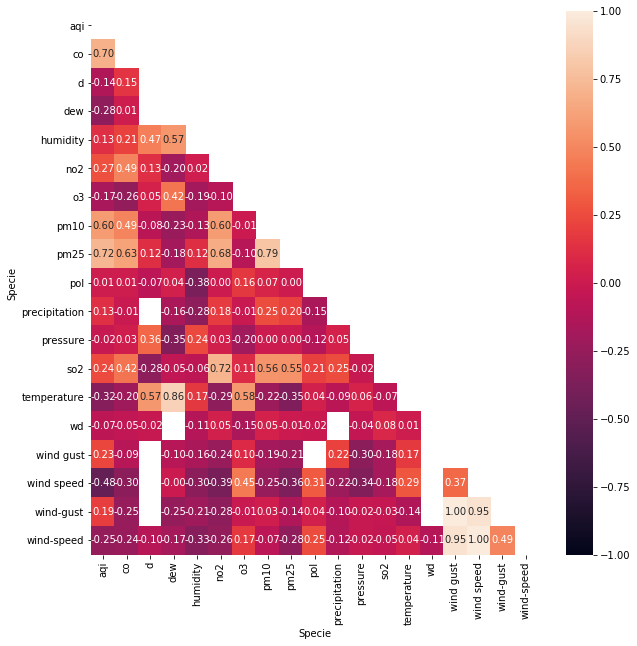

In [22]:
df_corr=df_specie_pivot.corr(method='pearson')

mask=np.triu(np.ones_like(df_corr))

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, fmt='.2f', vmin=-1, vmax=1, mask=mask)


In [72]:
#fine dust (pm10) has a clear positive linear relationship with no2 (nitrogen dioxide) and co (carbon monoxide)
#fine dust (pm10) has a weak negative linear relationship witj dew (dew) and humidity (humidity). 
# However, precipitation has a weak quantitative linear relationship with pm10.
# Can't find clear correlation between rain and air quality.


# Wind_gust and winde speed have a weak negative linear relationship with pm10 and pm25
# It is possible to hypothesize that fine dust increases as the wind increases.
# However, AQI and wind gust have a weak quantitative relationship (air quality gets better as the wind blows), and wind speed and aqi have a clear negative linear relationship (air quality gets worse as the wind blows).
# Hypothesis: If the wind gust is high, the air quality is bad because it is winter.

# Temperature has a distinct negative linear relationship with aqi (Air Quality Index) and pm25
# Temperature has a clear quantitative linear relationship with 03 (ozone) 

### pm2.5 EDA

In [68]:
#pm2.5 EDA
df_pm25=df_all[df_all["Specie"].str.contains("pm25")]

In [24]:
df_pm25["max"].max()

999.0

In [25]:
df_pm25.loc[df_pm25["max"]==999.0, ["Date", "City", "median", "min"]]
# "Shijiazhuang" is the city with the worst air pollution.
# A lot of dust was created in "Nanjing" from the second half of the year 21.
# While max is 999, min is 21, so the fluctuation of ultrafine dust is very high.

,Date,City,median,min
1562,2015-02-05,Shijiazhuang,132.0,21.0
1672,2015-06-03,Shijiazhuang,147.0,9.0
2337,2015-06-13,Zhengzhou,127.0,55.0
2369,2015-06-25,Zhengzhou,89.0,13.0
2430,2015-06-24,Zhengzhou,59.0,5.0
14068,2017-04-25,Shijiazhuang,78.0,21.0
20435,2018-05-23,Shijiazhuang,102.0,25.0
20483,2018-04-21,Shijiazhuang,157.0,30.0
20507,2018-04-13,Shijiazhuang,104.0,21.0
20515,2018-05-21,Shijiazhuang,134.0,21.0


In [26]:
df_pm25["median"].max()

999.0

In [27]:
df_pm25.loc[df_pm25["median"]==999.0, ["Date", "City", "min"]]


,Date,City,min
81311,2021-07-08,Shijiazhuang,17.0
81337,2021-07-09,Shijiazhuang,1.0


### Monthly PM2.5 EDA

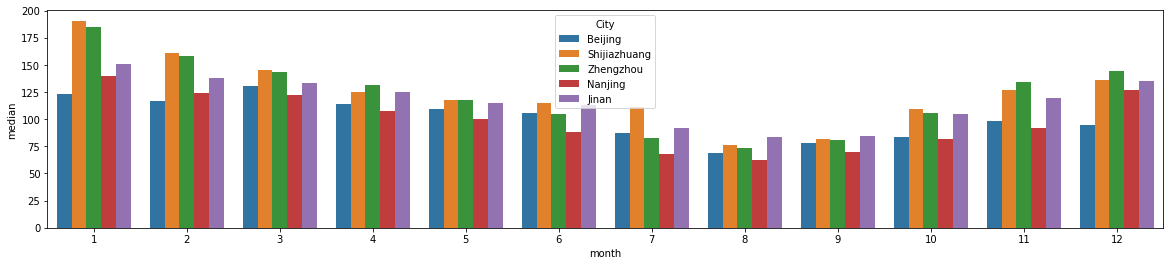

In [28]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_pm25, x="month", y="median", hue = 'City', ci=None)

# In general, ultrafine dust increases during the winter period (possibly due to heating)
# Zhengzhou and Shijiazhuang emit the most pollutions while Beijing generally emits low and less volatile dust.

### Yearly PM2.5 EDA in China

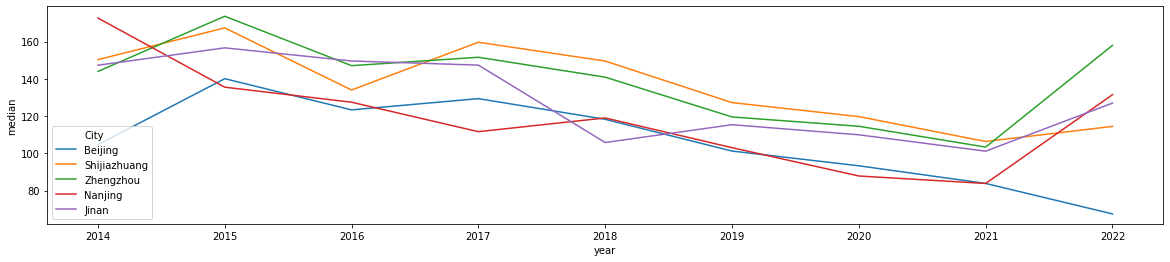

In [36]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_pm25, x="year", y="median", hue = 'City', ci=None)

# You can see that pm2.5 has been on a downward trend since 2015, but soared in 2022.
# Only in Beijing ultrafine dust is steadily decreasing.

## China-Korea EDA 

In [2]:
df_Kor=pd.read_csv("misemise_processed.csv", encoding='cp949')

In [3]:
df_Kor.head()

,지역,측정일시,연도,월,일,PM10,PM25
0,강원 강릉시,20150101,2015,1,1,60.375000,8.625000
1,강원 강릉시,20150102,2015,1,2,30.416667,7.416667
2,강원 강릉시,20150103,2015,1,3,27.333333,6.958333
3,강원 강릉시,20150104,2015,1,4,49.869565,21.782609
4,강원 강릉시,20150105,2015,1,5,62.291667,25.500000


In [83]:
df_Kor.shape

(416179, 7)

In [93]:
# It can be seen that the data was collected from 263 cities in Korea.
df_Kor.nunique()

지역        263
측정일시     2557
연도          7
월          12
일          31
PM10    80008
PM25    65836
dtype: int64

In [92]:
df_Kor["지역"].unique()

array(['강원 강릉시', '강원 고성군', '강원 동해시', '강원 삼척시', '강원 속초시', '강원 양구군',
       '강원 양양군', '강원 영월군', '강원 원주시', '강원 인제군', '강원 정선군', '강원 철원군',
       '강원 춘천시', '강원 태백시', '강원 평창군', '강원 홍천군', '강원 화천군', '강원 횡성군',
       '경기 가평군', '경기 고양시', '경기 과천시', '경기 광명시', '경기 광주시', '경기 구리시',
       '경기 군포시', '경기 김포시', '경기 남양주시', '경기 동두천시', '경기 부천시', '경기 성남시',
       '경기 수원시', '경기 시흥시', '경기 안산시', '경기 안성시', '경기 안양시', '경기 양주시',
       '경기 양평군', '경기 여주시', '경기 연천군', '경기 오산시', '경기 용인시', '경기 의왕시',
       '경기 의정부시', '경기 이천시', '경기 파주시', '경기 평택시', '경기 포천시', '경기 하남시',
       '경기 화성시', '경남 거제시', '경남 거창군', '경남 고성군', '경남 김해시', '경남 남해군',
       '경남 밀양시', '경남 사천시', '경남 산청군', '경남 양산시', '경남 의령군', '경남 진주시',
       '경남 창녕군', '경남 창원시', '경남 통영시', '경남 하동군', '경남 함안군', '경남 함양군',
       '경남 합천군', '경북 경산시', '경북 경주시', '경북 고령군', '경북 구미시', '경북 군위군',
       '경북 김천시', '경북 문경시', '경북 봉화군', '경북 상주시', '경북 성주군', '경북 안동시',
       '경북 영덕군', '경북 영양군', '경북 영주시', '경북 영천시', '경북 예천군', '경북 울릉군',
       '경북 울진군', '경북 의성군', '경북 청도군', '경북 청송군', '경북 칠곡군', '경

To analyze the impact of fine dust in China on Korea, I will select representative Korean cities from the West region(heavily affected by China), East region(less affected by China), and the South Region(mildly influenced by China).

Cities are chosen at a distance from each other to avoid possible soot effects between cities.

West region - cities heavily influenced by China: 'Seosan-si, Chungcheongnam-do,' 'Ganghwa-gun, Incheon', 'Goyang-si, Gyeonggi-do'

East region - cities less influenced by China: 'Gangneung-si, Gangwon-do', 'Samcheok-si, Gangwon-do', 'Pohang-si, Gyeongsangbuk-do'

Southern region - cities in the milde influence of China : 'Nam-gu, Ulsan', 'Yeosu-si, Jeollanam-do', 'Mokpo-si, Jeollanam-do'

### Making variables - West region, East region, Southern region

In [159]:
df_Kor_city= df_Kor[df_Kor["지역"].isin(['충남 서산시', '인천 강화군', '경기 고양시',  '강원 강릉시', '강원 삼척시', '경북 포항시',  '울산 남구', '전남 여수시', '전남 목포시'])]
df_Kor_city

,지역,측정일시,연도,월,일,PM10,PM25
0,강원 강릉시,20150101,2015,1,1,60.375000,8.625000
1,강원 강릉시,20150102,2015,1,2,30.416667,7.416667
2,강원 강릉시,20150103,2015,1,3,27.333333,6.958333
3,강원 강릉시,20150104,2015,1,4,49.869565,21.782609
4,강원 강릉시,20150105,2015,1,5,62.291667,25.500000
...,...,...,...,...,...,...,...
385557,충남 서산시,20211227,2021,12,27,27.980392,16.098039
385558,충남 서산시,20211228,2021,12,28,45.556701,30.948454
385559,충남 서산시,20211229,2021,12,29,48.529412,31.588235
385560,충남 서산시,20211230,2021,12,30,21.294118,9.210084


In [160]:
region_dict = {'충남 서산시': 'Kor_West', 
               '인천 강화군':'Kor_West', 
               '경기 고양시':'Kor_West', 
               '울산 남구':'Kor_South', 
               '전남 여수시':'Kor_South', 
               '전남 목포시':'Kor_South', 
               '강원 강릉시':'Kor_East', 
               '강원 삼척시':'Kor_East', 
               '경북 포항시':'Kor_East'}

df_Kor_city["지역 코드"] = df_Kor_city["지역"].map(region_dict)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [244]:
df_Kor_city.head()

,City,Date,year,month,day,PM10,PM25,Country
0,강원 강릉시,2015-01-01,2015,1,1,60.375000,8.625000,Kor_East
1,강원 강릉시,2015-01-02,2015,1,2,30.416667,7.416667,Kor_East
2,강원 강릉시,2015-01-03,2015,1,3,27.333333,6.958333,Kor_East
3,강원 강릉시,2015-01-04,2015,1,4,49.869565,21.782609,Kor_East
4,강원 강릉시,2015-01-05,2015,1,5,62.291667,25.500000,Kor_East


### Korea-China PM 2.5 Visualization

In [69]:
df_pm25

,Date,Country,City,Specie,count,min,max,median,variance,year,month,day
0,2015-01-04,CN,Beijing,pm25,450.0,80.0,494.0,255.0,65212.90,2015,1,4
1,2015-01-12,CN,Beijing,pm25,449.0,91.0,326.0,181.0,8349.02,2015,1,12
2,2015-02-17,CN,Beijing,pm25,336.0,13.0,197.0,68.0,10622.50,2015,2,17
3,2015-06-11,CN,Beijing,pm25,416.0,13.0,209.0,57.0,30655.90,2015,6,11
4,2015-06-13,CN,Beijing,pm25,446.0,13.0,140.0,42.0,5978.25,2015,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...
90164,2021-11-05,CN,Jinan,pm25,341.0,30.0,199.0,152.0,15301.00,2021,11,5
90165,2021-12-05,CN,Jinan,pm25,352.0,61.0,163.0,122.0,5409.69,2021,12,5
90166,2021-12-09,CN,Jinan,pm25,344.0,93.0,233.0,153.0,5547.22,2021,12,9
90167,2021-12-11,CN,Jinan,pm25,352.0,93.0,252.0,173.0,9272.23,2021,12,11


In [70]:
#Remove unnecessary data
df_pm25_CN = df_pm25.drop(columns=['Specie', 'count', 'min', 'max', 'variance'])


df_pm25_CN.rename(columns = {'median':'PM25'},inplace=True)

df_pm25_CN

,Date,Country,City,PM25,year,month,day
0,2015-01-04,CN,Beijing,255.0,2015,1,4
1,2015-01-12,CN,Beijing,181.0,2015,1,12
2,2015-02-17,CN,Beijing,68.0,2015,2,17
3,2015-06-11,CN,Beijing,57.0,2015,6,11
4,2015-06-13,CN,Beijing,42.0,2015,6,13
...,...,...,...,...,...,...,...
90164,2021-11-05,CN,Jinan,152.0,2021,11,5
90165,2021-12-05,CN,Jinan,122.0,2021,12,5
90166,2021-12-09,CN,Jinan,153.0,2021,12,9
90167,2021-12-11,CN,Jinan,173.0,2021,12,11


#### Concat Korea-China data

In [ ]:
import datetime as dt

In [162]:
df_Kor_city['측정일시']= pd.to_datetime(df_Kor_city['측정일시'], format = "%Y%m%d").dt.strftime('%Y-%m-%d') 

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [163]:
df_Kor_city['측정일시'] = pd.to_datetime(df_Kor_city['측정일시'])

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
df_Kor_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20386 entries, 0 to 385561
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지역      20386 non-null  object        
 1   측정일시    20386 non-null  datetime64[ns]
 2   연도      20386 non-null  int64         
 3   월       20386 non-null  int64         
 4   일       20386 non-null  int64         
 5   PM10    20386 non-null  float64       
 6   PM25    20386 non-null  float64       
 7   지역 코드   20386 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.4+ MB


In [166]:
df_Kor_city.rename(columns = {'지역 코드':'Country', 
                              '지역': 'City', 
                              '측정일시': 'Date',
                              '연도':'year',
                              '월':'month',
                              '일':'day'
                             },inplace=True)
df_Kor_city

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,City,Date,year,month,day,PM10,PM25,Country
0,강원 강릉시,2015-01-01,2015,1,1,60.375000,8.625000,Kor_East
1,강원 강릉시,2015-01-02,2015,1,2,30.416667,7.416667,Kor_East
2,강원 강릉시,2015-01-03,2015,1,3,27.333333,6.958333,Kor_East
3,강원 강릉시,2015-01-04,2015,1,4,49.869565,21.782609,Kor_East
4,강원 강릉시,2015-01-05,2015,1,5,62.291667,25.500000,Kor_East
...,...,...,...,...,...,...,...,...
385557,충남 서산시,2021-12-27,2021,12,27,27.980392,16.098039,Kor_West
385558,충남 서산시,2021-12-28,2021,12,28,45.556701,30.948454,Kor_West
385559,충남 서산시,2021-12-29,2021,12,29,48.529412,31.588235,Kor_West
385560,충남 서산시,2021-12-30,2021,12,30,21.294118,9.210084,Kor_West


In [336]:
df_CN_Kor = pd.concat([df_pm25_CN, df_Kor_city], join='inner')
df_CN_Kor.tail()

,Date,Country,City,PM25,year,month,day
385557,2021-12-27 00:00:00,Kor_West,충남 서산시,16.098039,2021,12,27
385558,2021-12-28 00:00:00,Kor_West,충남 서산시,30.948454,2021,12,28
385559,2021-12-29 00:00:00,Kor_West,충남 서산시,31.588235,2021,12,29
385560,2021-12-30 00:00:00,Kor_West,충남 서산시,9.210084,2021,12,30
385561,2021-12-31 00:00:00,Kor_West,충남 서산시,8.508475,2021,12,31


#### PM2.5 Normalization

In [ ]:
from sklearn import preprocessing
import pandas as pd

In [240]:
pm25_list = np.array(df_CN_Kor['PM25']).reshape(-1,1)
scaler = preprocessing.MinMaxScaler()
normalizedlist=scaler.fit_transform(pm25_list)
df_CN_Kor['pm25_normalized'] = normalizedlist
df_CN_Kor.head()

,Date,Country,City,PM25,year,month,day,pm25_normalized
0,2015-01-04,CN,Beijing,255.0,2015,1,4,0.254758
1,2015-01-12,CN,Beijing,181.0,2015,1,12,0.180634
2,2015-02-17,CN,Beijing,68.0,2015,2,17,0.067446
3,2015-06-11,CN,Beijing,57.0,2015,6,11,0.056427
4,2015-06-13,CN,Beijing,42.0,2015,6,13,0.041402


### Korea yearly PM2.5 EDA

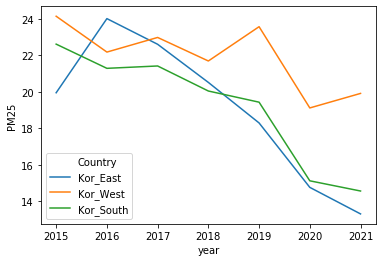

In [251]:
sns.lineplot(data=df_Kor_city, x="year", y="PM25", hue = 'Country', ci=None)

### Yearly China-Korea pm2.5 EDA

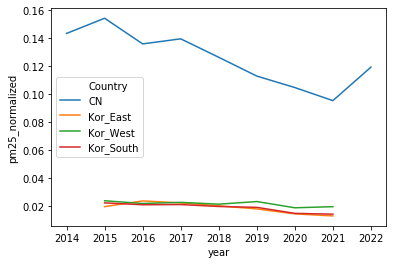

In [241]:
sns.lineplot(data=df_CN_Kor, x="year", y="pm25_normalized", hue = 'Country', ci=None)

Result: 

Fine dust has steadily decreased in both Korea and China.

Reduction in fine dust in western regions adjacent to China is less than that of eastern regions, so it can be said that it is partially influenced by China.

However, between 18-19, fine dust in China decreased while fine dust in western regions increased. If China's influence was absolute, the West regions should have decreased as well.

###  Korean Monthly PM2.5 EDA

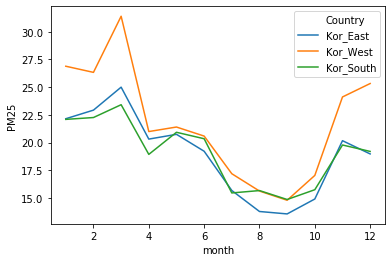

In [249]:

sns.lineplot(data=df_Kor_city, x="month", y="PM25", hue = 'Country', ci=None)

### China- Korean Monthly PM2.5 EDA

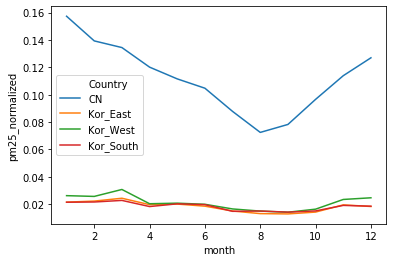

In [250]:
sns.lineplot(data=df_CN_Kor, x="month", y="pm25_normalized", hue = 'Country', ci=None)

### China- Korean PM2.5 Correlation analysis

In [346]:
df_CN_Kor[df_CN_Kor["Country"].str.contains("Kor")]

,Date,Country,City,PM25,year,month,day
0,2015-01-01 00:00:00,Kor_East,강원 강릉시,8.625000,2015,1,1
1,2015-01-02 00:00:00,Kor_East,강원 강릉시,7.416667,2015,1,2
2,2015-01-03 00:00:00,Kor_East,강원 강릉시,6.958333,2015,1,3
3,2015-01-04 00:00:00,Kor_East,강원 강릉시,21.782609,2015,1,4
4,2015-01-05 00:00:00,Kor_East,강원 강릉시,25.500000,2015,1,5
...,...,...,...,...,...,...,...
385557,2021-12-27 00:00:00,Kor_West,충남 서산시,16.098039,2021,12,27
385558,2021-12-28 00:00:00,Kor_West,충남 서산시,30.948454,2021,12,28
385559,2021-12-29 00:00:00,Kor_West,충남 서산시,31.588235,2021,12,29
385560,2021-12-30 00:00:00,Kor_West,충남 서산시,9.210084,2021,12,30


In [377]:
# I want to find the correlation between China and Korea by weaving various datasets into one data frame.
kor_series = pd.Series(df_CN_Kor[df_CN_Kor["Country"].str.contains("Kor")].PM25.values)
cn_series = pd.Series(df_CN_Kor[df_CN_Kor.Country=="CN"].PM25.values)
kor_est_series = pd.Series(df_CN_Kor[df_CN_Kor.Country=="Kor_East"].PM25.values)
kor_wst_series = pd.Series(df_CN_Kor[df_CN_Kor.Country=="Kor_West"].PM25.values)
kor_sou_series = pd.Series(df_CN_Kor[df_CN_Kor.Country=="Kor_South"].PM25.values)

df_cn_kor=pd.DataFrame({'CN' : cn_series,
                        'kor east' : kor_est_series,
                        'kor west' : kor_wst_series,
                        'kor south' : kor_sou_series,
                        'KR' : kor_series
                       })

In [378]:
df_cn_kor

,CN,kor east,kor west,kor south,KR
0,255.0,8.625000,51.478261,11.818182,8.625000
1,181.0,7.416667,25.021277,13.916667,7.416667
2,68.0,6.958333,27.355556,13.416667,6.958333
3,57.0,21.782609,42.312500,28.416667,21.782609
4,42.0,25.500000,56.708333,44.416667,25.500000
...,...,...,...,...,...
20381,NaN,NaN,NaN,NaN,16.098039
20382,NaN,NaN,NaN,NaN,30.948454
20383,NaN,NaN,NaN,NaN,31.588235
20384,NaN,NaN,NaN,NaN,9.210084


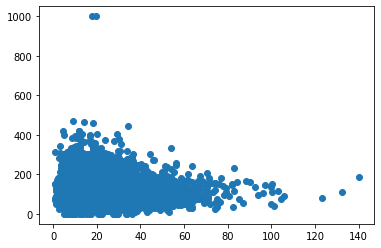

In [379]:
#Visualize PM2.5 correlation between Korea-China

plt.scatter(df_cn_kor['KR'], df_cn_kor['CN'])

#Can't find correlation

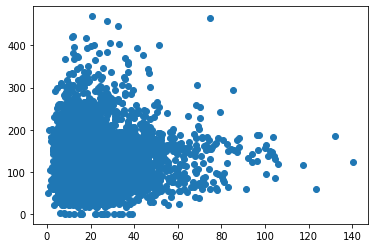

In [380]:
#Visualize PM2.5 correlation between Korea West Region-China

plt.scatter(df_cn_kor['kor west'], df_cn_kor['CN'])

#Can't find correlation

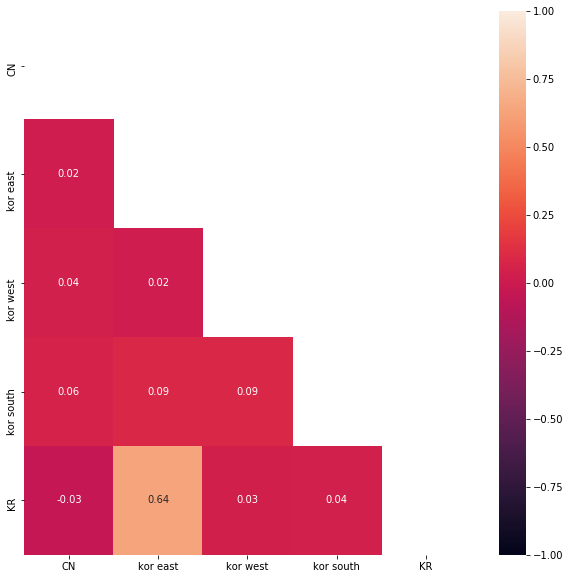

In [381]:
df_corr=df_cn_kor.corr(method='pearson')

mask=np.triu(np.ones_like(df_corr))

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, fmt='.2f', vmin=-1, vmax=1, mask=mask)

Can't find correlation between Korea-China

### China- Korean PM2.5 Correlation analysis(2nd Trial: Using bfill for NULL)

In [383]:
# There are many null values
df_cn_kor.isnull().sum()

CN           10852
kor east     13819
kor west     14025
kor south    12928
KR               0
dtype: int64

In [385]:
#Using bfil and ffil to replace null
df_cn_kor_2 = df_cn_kor.fillna(method='bfill')

df_cn_kor_2 = df_cn_kor_2.fillna(method='ffill')

In [386]:
df_cn_kor_2.isnull().sum()

CN           0
kor east     0
kor west     0
kor south    0
KR           0
dtype: int64

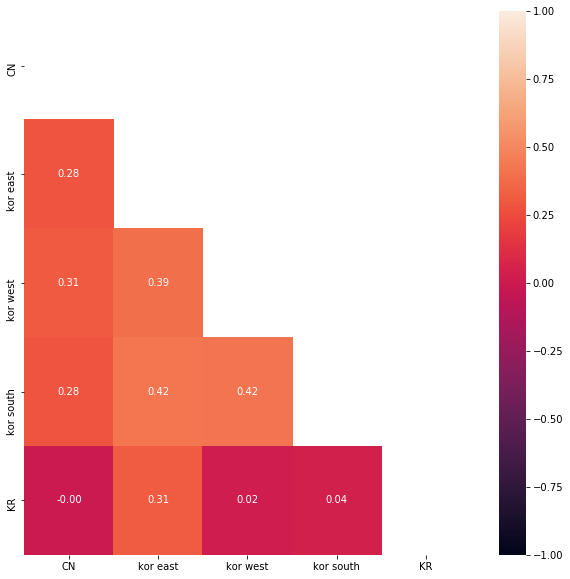

In [387]:
df_corr=df_cn_kor_2.corr(method='pearson')


mask=np.triu(np.ones_like(df_corr))

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, fmt='.2f', vmin=-1, vmax=1, mask=mask)

Found higher correlation between Korea-China

### China- Korean PM2.5 Correlation analysis(2nd Trial: Using mean for NULL)

In [388]:
#Using mean to replace null

kor_series_mean = pd.Series(df_CN_Kor[df_CN_Kor["Country"].str.contains("Kor")].groupby(['Date'], as_index=False).mean().PM25.values)
cn_series_mean = pd.Series(df_CN_Kor[df_CN_Kor.Country=="CN"].groupby(['Date'], as_index=False).mean().PM25.values)
kor_est_series_mean = pd.Series(df_CN_Kor[df_CN_Kor.Country=="Kor_East"].groupby(['Date'], as_index=False).mean().PM25.values)
kor_wst_series_mean = pd.Series(df_CN_Kor[df_CN_Kor.Country=="Kor_West"].groupby(['Date'], as_index=False).mean().PM25.values)
kor_sou_series_mean = pd.Series(df_CN_Kor[df_CN_Kor.Country=="Kor_South"].groupby(['Date'], as_index=False).mean().PM25.values)

In [394]:

df_cn_kor3=pd.DataFrame({'CN' : cn_series_mean,
                        'KR': kor_series_mean,
                        'kor east' : kor_est_series_mean,
                        'kor west' : kor_wst_series_mean,
                        'kor south' : kor_sou_series_mean
                       })

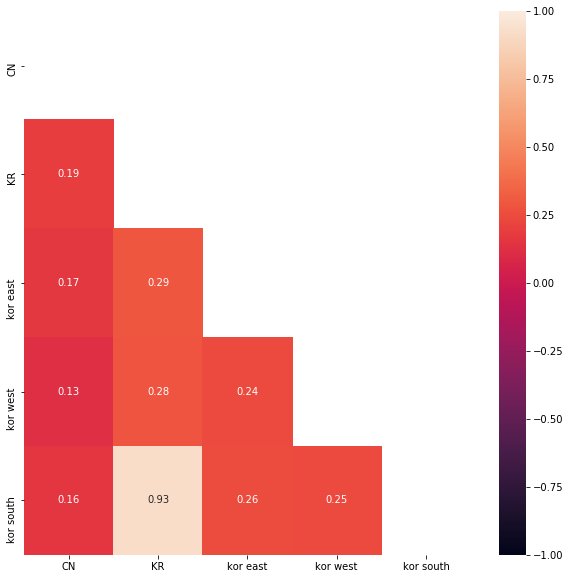

In [395]:
df_corr=df_cn_kor3.corr(method='pearson')


mask=np.triu(np.ones_like(df_corr))

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, fmt='.2f', vmin=-1, vmax=1, mask=mask)


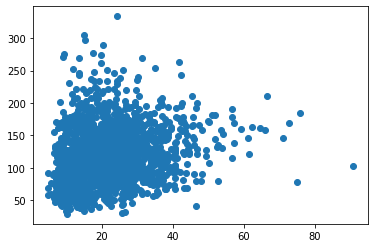

In [396]:
#Visualize PM2.5 correlation between Korea-China

plt.scatter(df_cn_kor3['KR'], df_cn_kor3['CN'])

#Can't find correlation


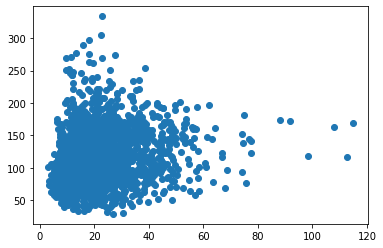

In [397]:
#Visualize PM2.5 correlation between Korea West region-China

plt.scatter(df_cn_kor3['kor west'], df_cn_kor3['CN'])

#Can't find correlation


Western regions, which were expected to be most affected by China, have the weakest correlation with China.

It can be said that about 20% of the total fine dust in Korea is affected by China, but it is difficult to claim that there is a significant relationship.

### Conclusion: Failed to prove that Korea's ultrafine dust (pm2.5) has a direct correlation with China's fine dust. 